In [ ]:
#IMPORT LIBRARIES
#Computation and Structuring:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import warnings

#Modeling:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.exceptions import UndefinedMetricWarning

#Testing:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [ ]:
#upload data file to collab
from google.colab import files
uploaded = files.upload()

#import full data set
import io
df = pd.read_csv('MCI_2014_to_2017.csv',sep=',')

Saving MCI_2014_to_2017.csv to MCI_2014_to_2017 (1).csv


In [ ]:
#list of relevant columns for model
col_list = ['occurrenceyear', 'occurrencemonth','occurrenceday','occurrencedayofyear','occurrencedayofweek','occurrencehour','MCI', 'Division', 'Hood_ID']

#dataframe created from list of relevant columns
df2 = df[col_list]
df = df[['occurrenceyear', 'MCI']]
df2 = df2[df2['occurrenceyear'] > 2013] #drop "stale" crimes, where occurence is before 2014. Since data set is filtered based on reported date, we're ignoring these old crimes

# Group by year and MCI
grouped = df.groupby(['occurrenceyear', 'MCI']).size().reset_index(name='count')

#Factorize dependent variable column:
crime_var = pd.factorize(df2['MCI']) #codes the list of crimes to a int64 variable
df2['MCI'] = crime_var[0]
definition_list_MCI = crime_var[1] #create an index reference so we know which crimes are coded to which factors
#factorize independent variables:

#factorize occurenceyear:
year_var = pd.factorize(df2['occurrenceyear'])
df2['occurrenceyear'] = year_var[0]
definition_list_year = year_var[1]

#factorize occurencemonth:
month_var = pd.factorize(df2['occurrencemonth'])
df2['occurrencemonth'] = month_var[0]
definition_list_month = month_var[1]

#factorize occurenceday:
day_var = pd.factorize(df2['occurrenceday'])
df2['occurenceday'] = day_var[0]
definition_list_day = day_var[1]

#factorize occurencedayofweek:
dayweek_var = pd.factorize(df2['occurrencedayofweek'])
df2['occurrencedayofweek'] = dayweek_var[0]
definition_list_day = dayweek_var[1]

#factorize division:
division_var = pd.factorize(df2['Division'])
df2['Division'] = division_var[0]
definition_list_division = division_var[1]

#factorize HOOD_ID:
hood_var = pd.factorize(df2['Hood_ID'])
df2['Hood_ID'] = hood_var[0]
definition_list_hood = hood_var[1]

#factorize occurencehour:
hour_var = pd.factorize(df2['occurrencehour'])
df2['occurrencehour'] = hour_var[0]
definition_list_hour = hour_var[1]

#factorize occurencedayofyear:
dayyear_var = pd.factorize(df2['occurrencedayofyear'])
df2['occurrencedayofyear'] = dayyear_var[0]
definition_list_dayyear = dayyear_var[1]

In [ ]:
#set X and Y:
X = df2.drop(['MCI'],axis=1).values #sets x and converts to an array
print(X)
y = df2['MCI'].values #sets y and converts to an array

[[ 0.  0. 25. ...  0.  0.  0.]
 [ 0.  0. 25. ...  1.  1.  0.]
 [ 0.  0. 25. ...  2.  2.  0.]
 ...
 [ 0.  1. 22. ...  4. 87. 16.]
 [ 0.  1. 21. ...  5. 78. 24.]
 [ 0.  1. 22. ...  3. 39. 16.]]


In [ ]:
#split the data into train and test sets for numeric encoded dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

# OneHotEncode all the X variables for input into the classification model:
binary_encoder = OneHotEncoder(sparse_output=False)  # Explicitly set sparse_output to False
encoded_X = binary_encoder.fit_transform(X)

# Split the data into train and test sets for one-hot encoded dataset:
X_train_OH, X_test_OH, y_train_OH, y_test_OH = train_test_split(encoded_X, y, test_size=0.25, random_state=21)


In [ ]:
#MODELING AND TESTING:
#Numeric Encoded Model w/ SKLEARN:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) #Predicting the Test set results
print(accuracy_score(y_test, y_pred)) #accuracy at 0.5778378710589392
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred, target_names=definition_list_MCI))


0.5778378710589392
[[15777  1140   378    65   346]
 [ 5007  1445    95    49   203]
 [ 2292   212  1020    10    79]
 [  841   120    12    21    36]
 [ 2410   346    70    27   541]]
                 precision    recall  f1-score   support

        Assault       0.60      0.89      0.72     17706
Break and Enter       0.44      0.21      0.29      6799
        Robbery       0.65      0.28      0.39      3613
     Theft Over       0.12      0.02      0.03      1030
     Auto Theft       0.45      0.16      0.24      3394

       accuracy                           0.58     32542
      macro avg       0.45      0.31      0.33     32542
   weighted avg       0.54      0.58      0.52     32542



In [ ]:
#One Hot Encoded Model w/ SKLEARN:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train_OH, y_train_OH)
y_pred_OH = classifier.predict(X_test_OH) #Predicting the Test set results
print(accuracy_score(y_test_OH, y_pred_OH)) #modest improvement to 0.5914203183578145
print(confusion_matrix(y_test_OH, y_pred_OH))
print(classification_report(y_test_OH,y_pred_OH, target_names=definition_list_MCI)) #modest improvement

0.5914203183578145
[[16174   931   300    38   263]
 [ 5040  1515    64    29   151]
 [ 2378   168   997     3    67]
 [  854   118     8    15    35]
 [ 2500   315    27     7   545]]
                 precision    recall  f1-score   support

        Assault       0.60      0.91      0.72     17706
Break and Enter       0.50      0.22      0.31      6799
        Robbery       0.71      0.28      0.40      3613
     Theft Over       0.16      0.01      0.03      1030
     Auto Theft       0.51      0.16      0.24      3394

       accuracy                           0.59     32542
      macro avg       0.50      0.32      0.34     32542
   weighted avg       0.57      0.59      0.53     32542



In [ ]:
#Balanced Class Weight:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42, class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred)) #accuracy at 0.5750722143691229
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred, target_names=definition_list_MCI))


0.5750722143691229
[[15752  1081   433    84   356]
 [ 5133  1323    98    47   198]
 [ 2230   210  1071    10    92]
 [  837   124    17    20    32]
 [ 2442   311    65    28   548]]
                 precision    recall  f1-score   support

        Assault       0.60      0.89      0.71     17706
Break and Enter       0.43      0.19      0.27      6799
        Robbery       0.64      0.30      0.40      3613
     Theft Over       0.11      0.02      0.03      1030
     Auto Theft       0.45      0.16      0.24      3394

       accuracy                           0.58     32542
      macro avg       0.44      0.31      0.33     32542
   weighted avg       0.54      0.58      0.52     32542



In [ ]:
# Suppress UndefinedMetricWarning to catch it manually
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [ ]:
# gradientboost performs poorly relative to randomforest
grad_class = GradientBoostingClassifier(learning_rate=0.1, n_estimators=10, random_state=42)
grad_class.fit(X_train_OH, y_train_OH)
y_pred_OH = grad_class.predict(X_test_OH)  # Predicting the Test set results
print(accuracy_score(y_test_OH, y_pred_OH))  # modest improvement to 0.5441
print(confusion_matrix(y_test_OH, y_pred_OH))

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
    try:
        print(classification_report(y_test_OH, y_pred_OH, target_names=definition_list_MCI, zero_division='warn'))
    except UndefinedMetricWarning as e:
        print(f"Classification Report Warning: {e}")

0.5441583184807326
[[17704     0     0     0     2]
 [ 6799     0     0     0     0]
 [ 3613     0     0     0     0]
 [ 1030     0     0     0     0]
 [ 3390     0     0     0     4]]
                 precision    recall  f1-score   support

        Assault       0.54      1.00      0.70     17706
Break and Enter       0.00      0.00      0.00      6799
        Robbery       0.00      0.00      0.00      3613
     Theft Over       0.00      0.00      0.00      1030
     Auto Theft       0.67      0.00      0.00      3394

       accuracy                           0.54     32542
      macro avg       0.24      0.20      0.14     32542
   weighted avg       0.37      0.54      0.38     32542



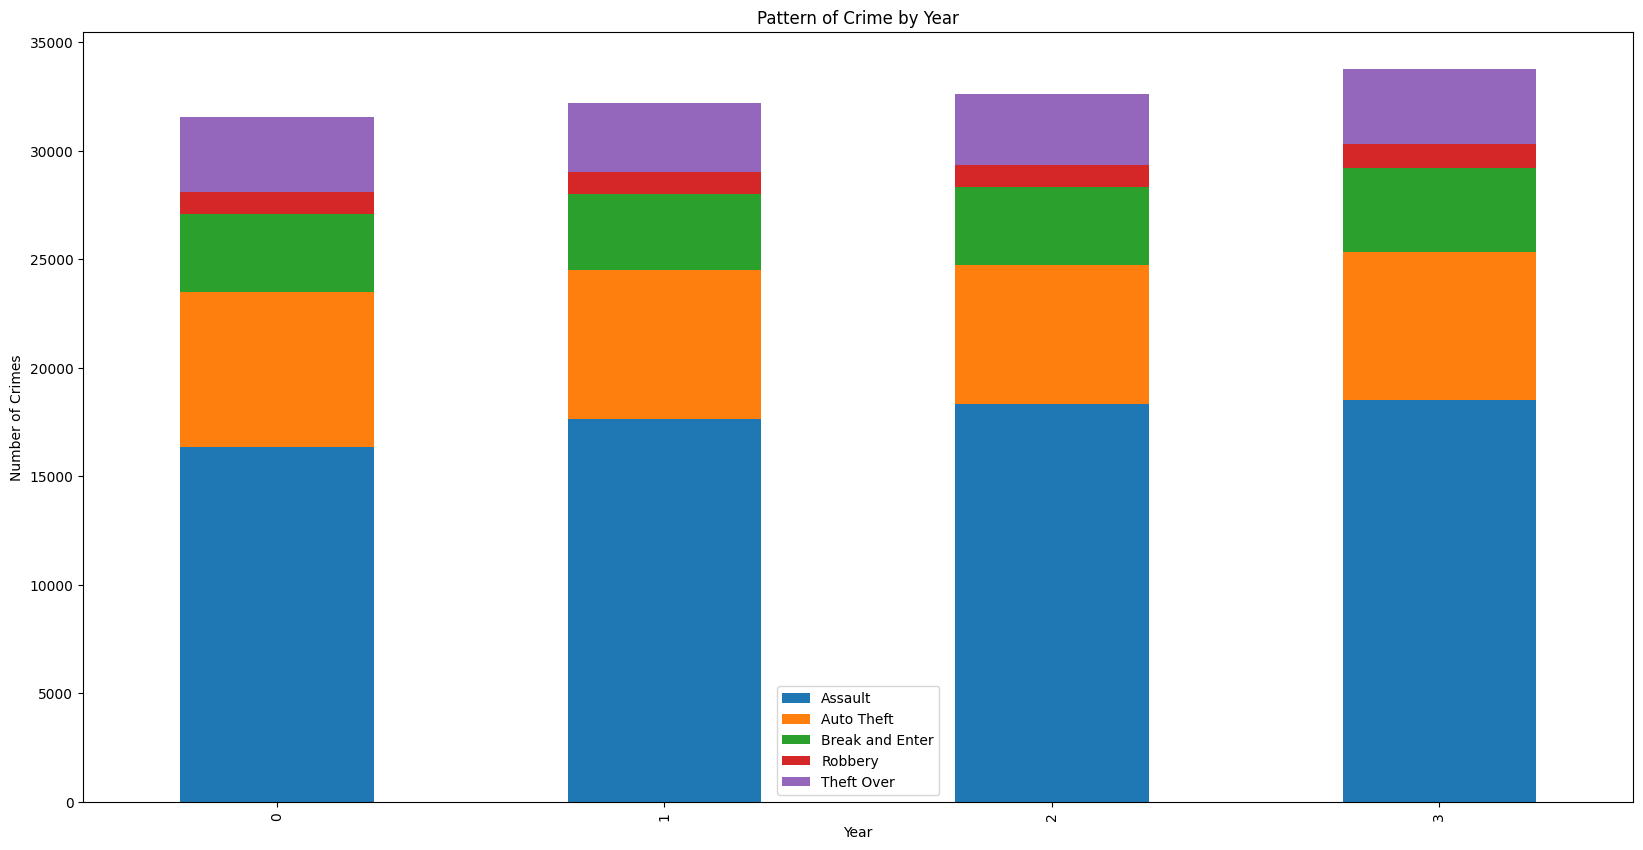

In [ ]:
# Get the year and crime count
year_crime = df2.groupby("occurrenceyear")['MCI'].count()

#Plotting the pattern of crime for each year
df2.groupby(['occurrenceyear', 'MCI']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10))
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Pattern of Crime by Year')
plt.legend(['Assault', 'Auto Theft', 'Break and Enter', 'Robbery', 'Theft Over'])

plt.show()